In [265]:
# Import libraries for the lab
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Optional. Makes decimal values look nicer.

%matplotlib inline 

In [266]:
#reading and storing the data set into a data frame df
df = pd.read_csv('ObesityDataSet.csv')

## Data understanding and Data Pre-processing
### Looking at the variables and checking if they have the right data types

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [268]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female 21.00    1.62   64.00                            yes   no  2.00   
1  Female 21.00    1.52   56.00                            yes   no  3.00   
2    Male 23.00    1.80   77.00                            yes   no  2.00   
3    Male 27.00    1.80   87.00                             no   no  3.00   
4    Male 22.00    1.78   89.80                             no   no  2.00   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0 3.00  Sometimes    no  2.00   no 0.00 1.00          no   
1 3.00  Sometimes   yes  3.00  yes 3.00 0.00   Sometimes   
2 3.00  Sometimes    no  2.00   no 2.00 1.00  Frequently   
3 3.00  Sometimes    no  2.00   no 2.00 0.00  Frequently   
4 1.00  Sometimes    no  2.00   no 0.00 0.00   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

### Renaming attributes for better understanding

In [269]:
attribute_dict = {'FAVC':'is_high_caloric_food_consumed','FCVC':'vegetables_frequency','NCP':'Number_of_meals_daily',
                 'CAEC':'food_between_meals_frequency','CH2O' :'water_quantity','SCC':'are_calories_monitored','FAF':'physical_activity_in_hours',
                 'TUE':'screentime_in_hours', 'CALC' :'alcohol_frequency','MTRANS':'Transportation_used','NObeyesdad': 'Obese_Type'}

In [270]:
df.rename(columns = attribute_dict, inplace=True)

In [271]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight  \
0  Female 21.00    1.62   64.00                            yes   
1  Female 21.00    1.52   56.00                            yes   
2    Male 23.00    1.80   77.00                            yes   
3    Male 27.00    1.80   87.00                             no   
4    Male 22.00    1.78   89.80                             no   

  is_high_caloric_food_consumed  vegetables_frequency  Number_of_meals_daily  \
0                            no                  2.00                   3.00   
1                            no                  3.00                   3.00   
2                            no                  2.00                   3.00   
3                            no                  3.00                   3.00   
4                            no                  2.00                   1.00   

  food_between_meals_frequency SMOKE  water_quantity are_calories_monitored  \
0                    Sometimes    no            2.00                     no   
1                    Sometimes   yes            3.00                    yes   
2                    Sometimes    no            2.00                     no   
3                    Sometimes    no            2.00                     no   
4                    Sometimes    no            2.00                     no   

   physical_activity_in_hours  screentime_in_hours alcohol_frequency  \
0                        0.00                 1.00                no   
1                        3.00                 0.00         Sometimes   
2                        2.00                 1.00        Frequently   
3                        2.00                 0.00        Frequently   
4                        0.00                 0.00         Sometimes   

     Transportation_used           Obese_Type  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [272]:
# checking unique values in each attribute
df.nunique().sort_values()

Gender                               2
are_calories_monitored               2
SMOKE                                2
family_history_with_overweight       2
is_high_caloric_food_consumed        2
alcohol_frequency                    4
food_between_meals_frequency         4
Transportation_used                  5
Obese_Type                           7
Number_of_meals_daily              635
vegetables_frequency               810
screentime_in_hours               1129
physical_activity_in_hours        1190
water_quantity                    1268
Age                               1402
Weight                            1525
Height                            1574
dtype: int64

#### Checking if there is correlation between any of the numeric variables

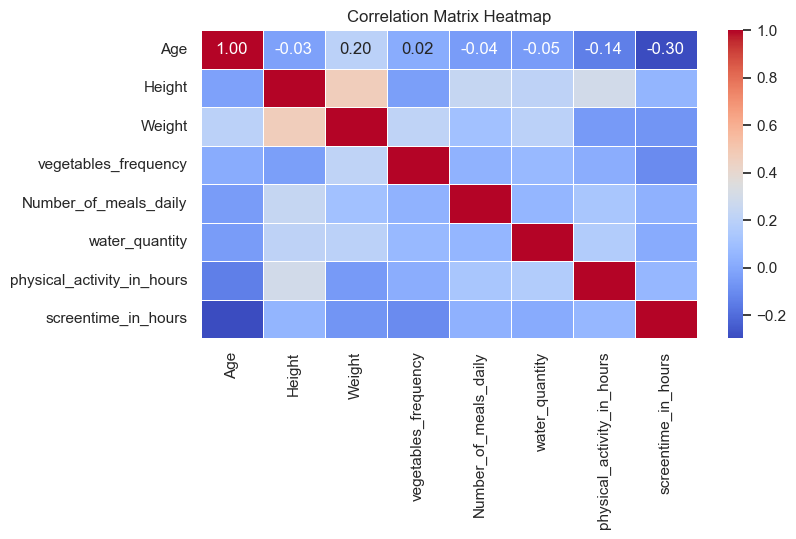

In [273]:
correlation_matrix = df.corr(numeric_only = True)

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Excluding "Weight" and "Height" attributes from the analysis, as they directly correlate with obesity levels, potentially making the prediction task overly simplistic.

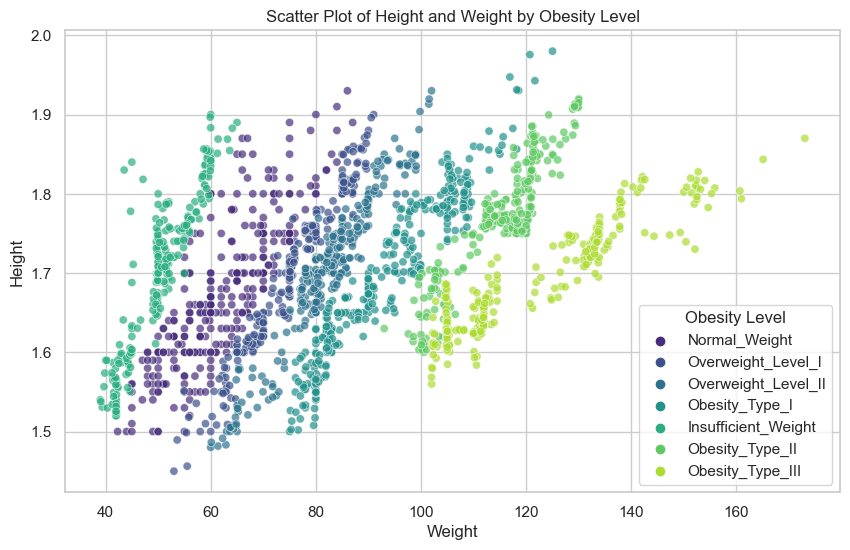

In [274]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight', y='Height', hue='Obese_Type', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Height and Weight by Obesity Level')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(title='Obesity Level')
plt.grid(True)
plt.show()

In [275]:
df = df.drop('Weight', axis=1)

In [276]:
df = df.drop('Height', axis=1)

### Removing Duplicates

In [277]:
df.shape

(2111, 15)

In [278]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [279]:
df.shape

(2082, 15)

### Understanding and analyzing attributes

In [280]:
df['Age'].describe(percentiles=[0.25,0.50,0.75,0.80,0.85,0.90,0.95, 0.97, 0.98, 0.999, 0.9999])

count    2082.00
mean       24.36
std         6.37
min        14.00
25%        19.94
50%        22.85
75%        26.00
80%        28.71
85%        30.71
90%        33.29
95%        38.11
97%        39.99
98%        40.98
99.9%      55.24
99.99%     59.96
max        61.00
Name: Age, dtype: float64

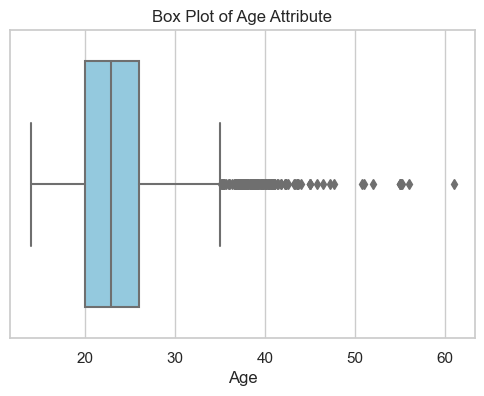

In [281]:
# Create a box plot for the "Age" attribute
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'], color='skyblue')

# Set title and labels
plt.title('Box Plot of Age Attribute')
plt.xlabel('Age')

# Show plot
plt.show()

#### The "age" attribute exhibits outliers, as illustrated in the accompanying plot. These outliers were not addressed, as age significantly influences obesity levels. Handling outliers could potentially result in the loss of crucial information.

In [282]:
df['Obese_Type'].value_counts()

Obese_Type
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          279
Overweight_Level_I     276
Insufficient_Weight    265
Name: count, dtype: int64

### Reducing the possible values of the target variable 

The target variable is classified into 7 values, I am reducing it to 4 values by combining them as shown below :

**Insufficient Weight**

**Normal Weight**

Overweight Level I, Overweight Level II  -> **Overweight**

Obesity Type I, Obesity Type II, and Obesity Type III  -> **Obese**

This is done to make it easier for a model to identify patterns in the data


In [283]:
mapping = {
    'Insufficient_Weight': 'Insufficient Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}


In [284]:
df['Obese_Type'].replace(mapping, inplace=True)

In [285]:
df['Obese_Type'].value_counts()

Obese_Type
Obese                  972
Overweight             566
Normal Weight          279
Insufficient Weight    265
Name: count, dtype: int64

### Using ydata_profiling to speed up data exploration

In [286]:
from ydata_profiling import ProfileReport

In [287]:
profile = ProfileReport(df, title="Profiling Report")

In [288]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [289]:
df['alcohol_frequency'].value_counts()

alcohol_frequency
Sometimes     1377
no             634
Frequently      70
Always           1
Name: count, dtype: int64

#### Here, 'Always' in alcohol frequency seems like an incorrect value, so changing it to Frequently

In [290]:
df['alcohol_frequency'].replace({'Always': 'Frequently'}, inplace=True)

In [291]:
df['alcohol_frequency'].value_counts()

alcohol_frequency
Sometimes     1377
no             634
Frequently      71
Name: count, dtype: int64

In [292]:
df['Transportation_used'].value_counts()

Transportation_used
Public_Transportation    1555
Automobile                454
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

### In the 'Transportation_used' attribute, there are a lot of categories. This might reduce the performance of model, so I am going to reduce the number of categories in 'Transportation_used'. Creating three categories for the "Transportation" attribute—Public, Automobile(this will include motorbike), and Walk/Bike—can be a reasonable approach. This simplification retains some level of granularity while still reducing the number of categories. With three categories, the model remains relatively easy to interpret, yet it still captures some nuances in transportation choices that could impact obesity levels

In [293]:
df['Transportation_used'].replace({'Motorbike': 'Automobile','Walking':'Walk/Bike','Bike':'Walk/Bike'}, inplace=True)

In [294]:
df['Transportation_used'].value_counts()

Transportation_used
Public_Transportation    1555
Automobile                465
Walk/Bike                  62
Name: count, dtype: int64

In [295]:
import pandas as pd
df_dummies = pd.get_dummies(df)

In [296]:
df_dummies.shape

(2082, 30)

In [297]:
df_dummies.head()

Age  vegetables_frequency  Number_of_meals_daily  water_quantity  \
0 21.00                  2.00                   3.00            2.00   
1 21.00                  3.00                   3.00            3.00   
2 23.00                  2.00                   3.00            2.00   
3 27.00                  3.00                   3.00            2.00   
4 22.00                  2.00                   1.00            2.00   

   physical_activity_in_hours  screentime_in_hours  Gender_Female  \
0                        0.00                 1.00           True   
1                        3.00                 0.00           True   
2                        2.00                 1.00          False   
3                        2.00                 0.00          False   
4                        0.00                 0.00          False   

   Gender_Male  family_history_with_overweight_no  \
0        False                              False   
1        False                              False   
2         True                              False   
3         True                               True   
4         True                               True   

   family_history_with_overweight_yes  ...  alcohol_frequency_Frequently  \
0                                True  ...                         False   
1                                True  ...                         False   
2                                True  ...                          True   
3                               False  ...                          True   
4                               False  ...                         False   

   alcohol_frequency_Sometimes  alcohol_frequency_no  \
0                        False                  True   
1                         True                 False   
2                        False                 False   
3                        False                 False   
4                         True                 False   

   Transportation_used_Automobile  Transportation_used_Public_Transportation  \
0                           False                                       True   
1                           False                                       True   
2                           False                                       True   
3                           False                                      False   
4                           False                                       True   

   Transportation_used_Walk/Bike  Obese_Type_Insufficient Weight  \
0                          False                           False   
1                          False                           False   
2                          False                           False   
3                           True                           False   
4                          False                           False   

   Obese_Type_Normal Weight  Obese_Type_Obese  Obese_Type_Overweight  
0                      True             False                  False  
1                      True             False                  False  
2                      True             False                  False  
3                     False             False                   True  
4                     False             False                   True  

[5 rows x 30 columns]

In [298]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2082 entries, 0 to 2110
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        2082 non-null   float64
 1   vegetables_frequency                       2082 non-null   float64
 2   Number_of_meals_daily                      2082 non-null   float64
 3   water_quantity                             2082 non-null   float64
 4   physical_activity_in_hours                 2082 non-null   float64
 5   screentime_in_hours                        2082 non-null   float64
 6   Gender_Female                              2082 non-null   bool   
 7   Gender_Male                                2082 non-null   bool   
 8   family_history_with_overweight_no          2082 non-null   bool   
 9   family_history_with_overweight_yes         2082 non-null   bool   
 10  is_high_caloric_food_consumed

In [299]:
# Variable we will be predicting
Y = df_dummies[['Obese_Type_Insufficient Weight','Obese_Type_Normal Weight','Obese_Type_Obese','Obese_Type_Overweight']]

# All the other variables
X = df_dummies.drop(['Obese_Type_Insufficient Weight','Obese_Type_Normal Weight','Obese_Type_Obese','Obese_Type_Overweight'], axis=1)

In [300]:
Y.head()

Obese_Type_Insufficient Weight  Obese_Type_Normal Weight  Obese_Type_Obese  \
0                           False                      True             False   
1                           False                      True             False   
2                           False                      True             False   
3                           False                     False             False   
4                           False                     False             False   

   Obese_Type_Overweight  
0                  False  
1                  False  
2                  False  
3                   True  
4                   True

In [301]:
X.head()

Age  vegetables_frequency  Number_of_meals_daily  water_quantity  \
0 21.00                  2.00                   3.00            2.00   
1 21.00                  3.00                   3.00            3.00   
2 23.00                  2.00                   3.00            2.00   
3 27.00                  3.00                   3.00            2.00   
4 22.00                  2.00                   1.00            2.00   

   physical_activity_in_hours  screentime_in_hours  Gender_Female  \
0                        0.00                 1.00           True   
1                        3.00                 0.00           True   
2                        2.00                 1.00          False   
3                        2.00                 0.00          False   
4                        0.00                 0.00          False   

   Gender_Male  family_history_with_overweight_no  \
0        False                              False   
1        False                              False   
2         True                              False   
3         True                               True   
4         True                               True   

   family_history_with_overweight_yes  ...  SMOKE_no  SMOKE_yes  \
0                                True  ...      True      False   
1                                True  ...     False       True   
2                                True  ...      True      False   
3                               False  ...      True      False   
4                               False  ...      True      False   

   are_calories_monitored_no  are_calories_monitored_yes  \
0                       True                       False   
1                      False                        True   
2                       True                       False   
3                       True                       False   
4                       True                       False   

   alcohol_frequency_Frequently  alcohol_frequency_Sometimes  \
0                         False                        False   
1                         False                         True   
2                          True                        False   
3                          True                        False   
4                         False                         True   

   alcohol_frequency_no  Transportation_used_Automobile  \
0                  True                           False   
1                 False                           False   
2                 False                           False   
3                 False                           False   
4                 False                           False   

   Transportation_used_Public_Transportation  Transportation_used_Walk/Bike  
0                                       True                          False  
1                                       True                          False  
2                                       True                          False  
3                                      False                           True  
4                                       True                          False  

[5 rows x 26 columns]

### For splitting data as train and test data. I am using 75% for training and 25% for testing.


In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [304]:
X_train.shape

(1561, 26)

In [305]:
y_train.head(2)

Obese_Type_Insufficient Weight  Obese_Type_Normal Weight  \
722                            True                     False   
545                            True                     False   

     Obese_Type_Obese  Obese_Type_Overweight  
722             False                  False  
545             False                  False

In [184]:
X_test.shape

(521, 26)

### Scaling and Principal Component Analysis (PCA) before Modelling
In this dataset, converting categorical variables to dummy numeric variables resulted in many new columns, increasing the curse of dimensionality. PCA can help  reduce the number of variables while preserving most of the information.

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### PCA

In [187]:
from sklearn.decomposition import PCA
import numpy as np


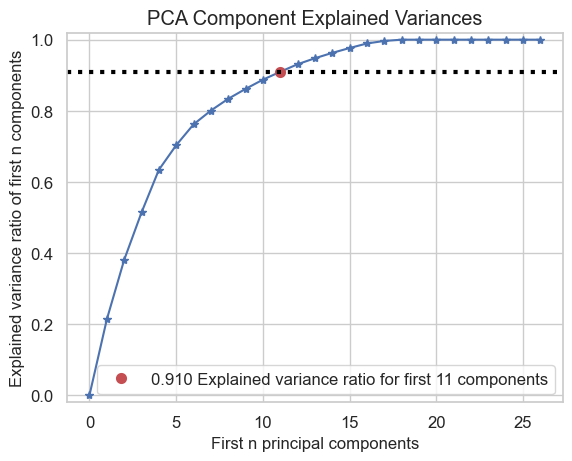

In [188]:
import scikitplot as skplt
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

skplt.decomposition.plot_pca_component_variance(pca, target_explained_variance=0.90)
plt.show()

In [189]:
pca = PCA(n_components=len(X_train.columns), random_state=42)
pca.fit(X_train_scaled)
print(f"Explained variance by PCs: {list(np.round(pca.explained_variance_ratio_, 4))}")


Explained variance by PCs: [0.2131, 0.1674, 0.1333, 0.12, 0.0693, 0.0585, 0.039, 0.0331, 0.0279, 0.0259, 0.0222, 0.0213, 0.0169, 0.0151, 0.0137, 0.0128, 0.0071, 0.0035, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### Considering first 11 columns as they capture 90% of the variability in the data.

In [190]:
pca = PCA(n_components=11, random_state=42)
pca.fit(X_train_scaled)

X_train_PCA = pd.DataFrame(pca.transform(X_train_scaled))
X_test_PCA = pd.DataFrame(pca.transform(X_test_scaled))

In [191]:
X_train_PCA.columns = [str(column_name) for column_name in X_train_PCA.columns]
X_test_PCA.columns = [str(column_name) for column_name in X_test_PCA.columns]

In [192]:
X_train_PCA.head()

0     1     2     3     4     5     6    7     8     9    10
0  1.01 -0.35  0.47  0.31 -0.71 -0.51  0.02 0.21 -0.23  0.25 -0.40
1  0.72  1.13 -0.15 -0.37 -0.24  1.11 -0.08 0.68  0.03 -0.00 -0.14
2  0.67 -0.53 -0.32 -0.30  0.05  0.01  0.17 0.12 -0.02 -0.35  0.16
3 -0.10  0.02  1.07  0.23  1.29  0.85 -0.82 0.12 -0.11 -0.34 -0.15
4 -1.05 -0.53 -0.32  0.67 -0.08  0.08  0.06 0.42  0.04  0.28 -0.10

## Modelling

#### Decision Tree Classifier - Using PCA train data

In [195]:
from sklearn import tree

In [196]:
model_with_pca = tree.DecisionTreeClassifier(random_state=42)

In [50]:
model_with_pca.fit(X_train_PCA, y_train)

DecisionTreeClassifier(random_state=42)

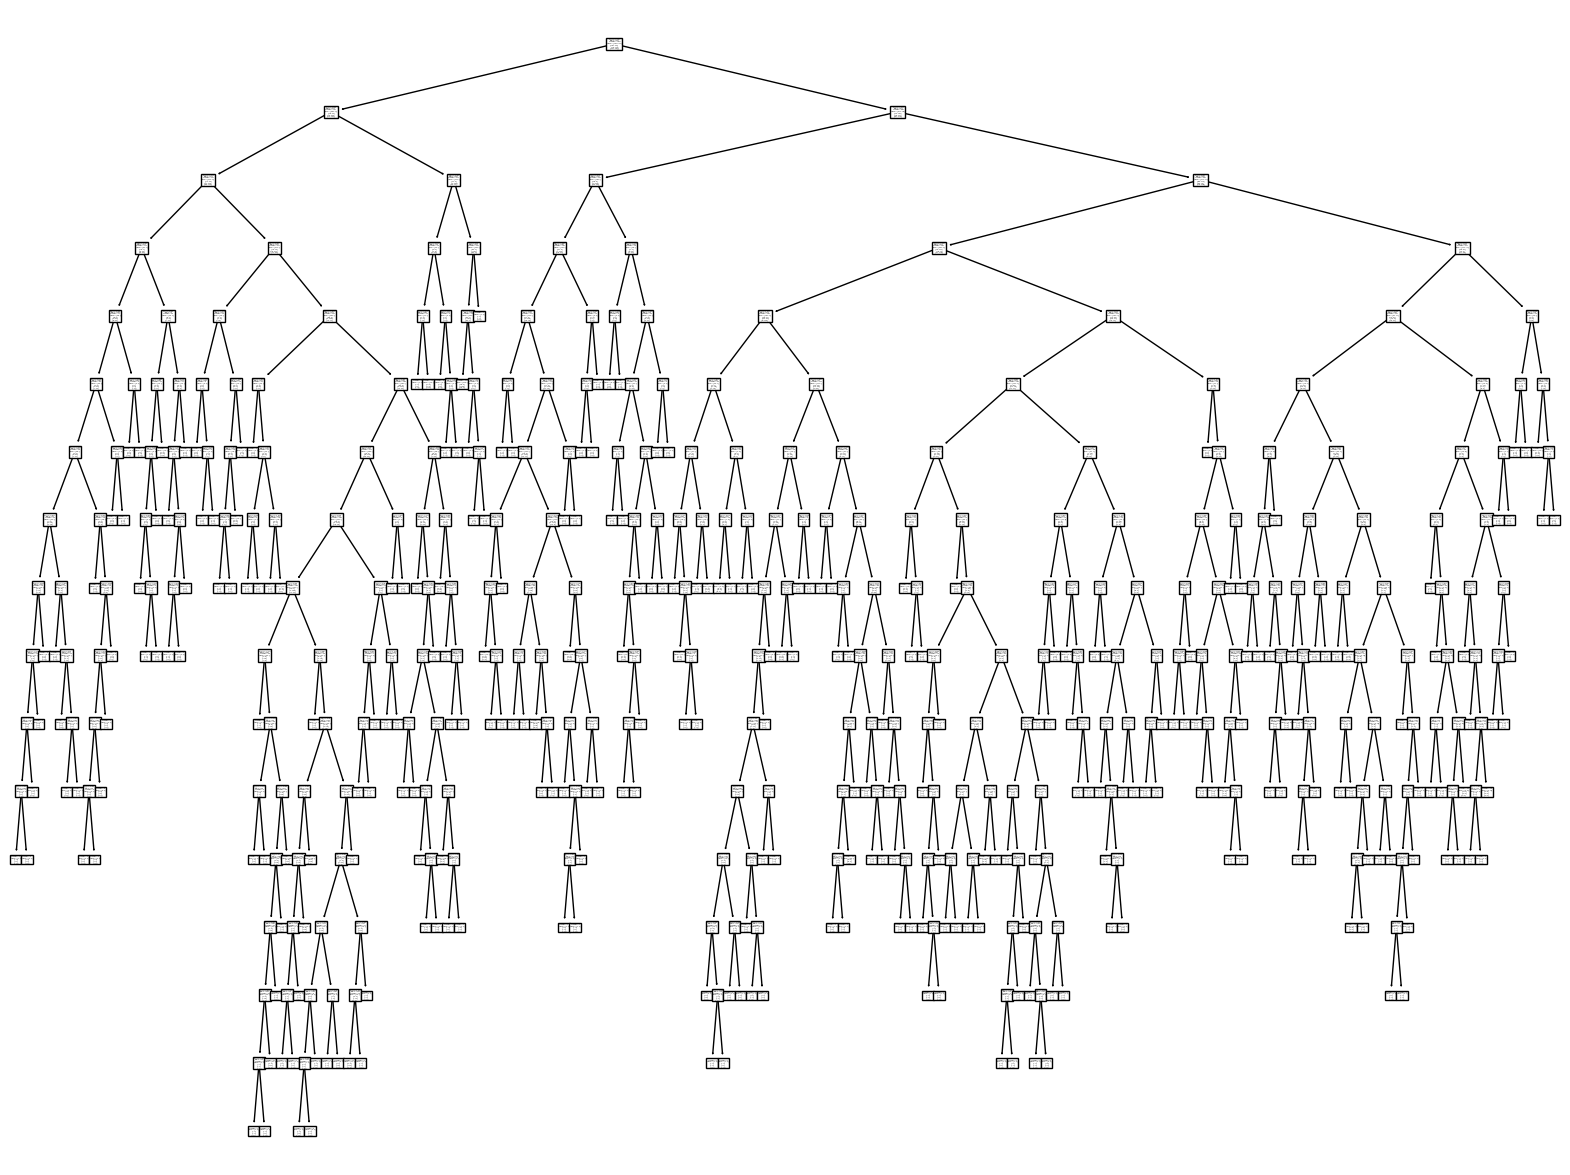

In [51]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model_with_pca);
# fig.savefig("decistion_tree.png")

In [52]:
y_pred_pca = model_with_pca.predict(X_test_PCA)

#### Feature Importance

In [53]:
feature_importances = pd.Series(model_with_pca.feature_importances_, model_with_pca.feature_names_in_).sort_values()

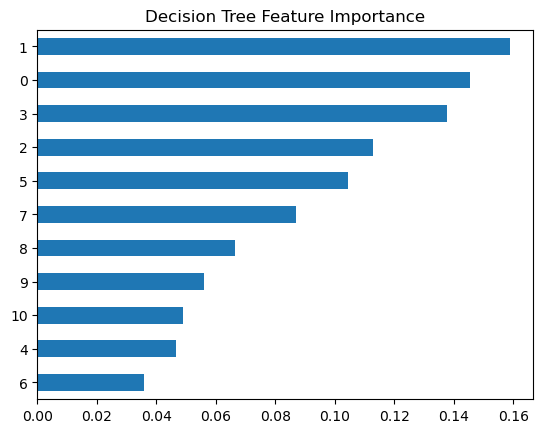

In [54]:
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

### Doing Decision Tree model without using PCA data

In [200]:
from sklearn import tree

In [201]:
model_DT = tree.DecisionTreeClassifier(random_state=42)

In [202]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

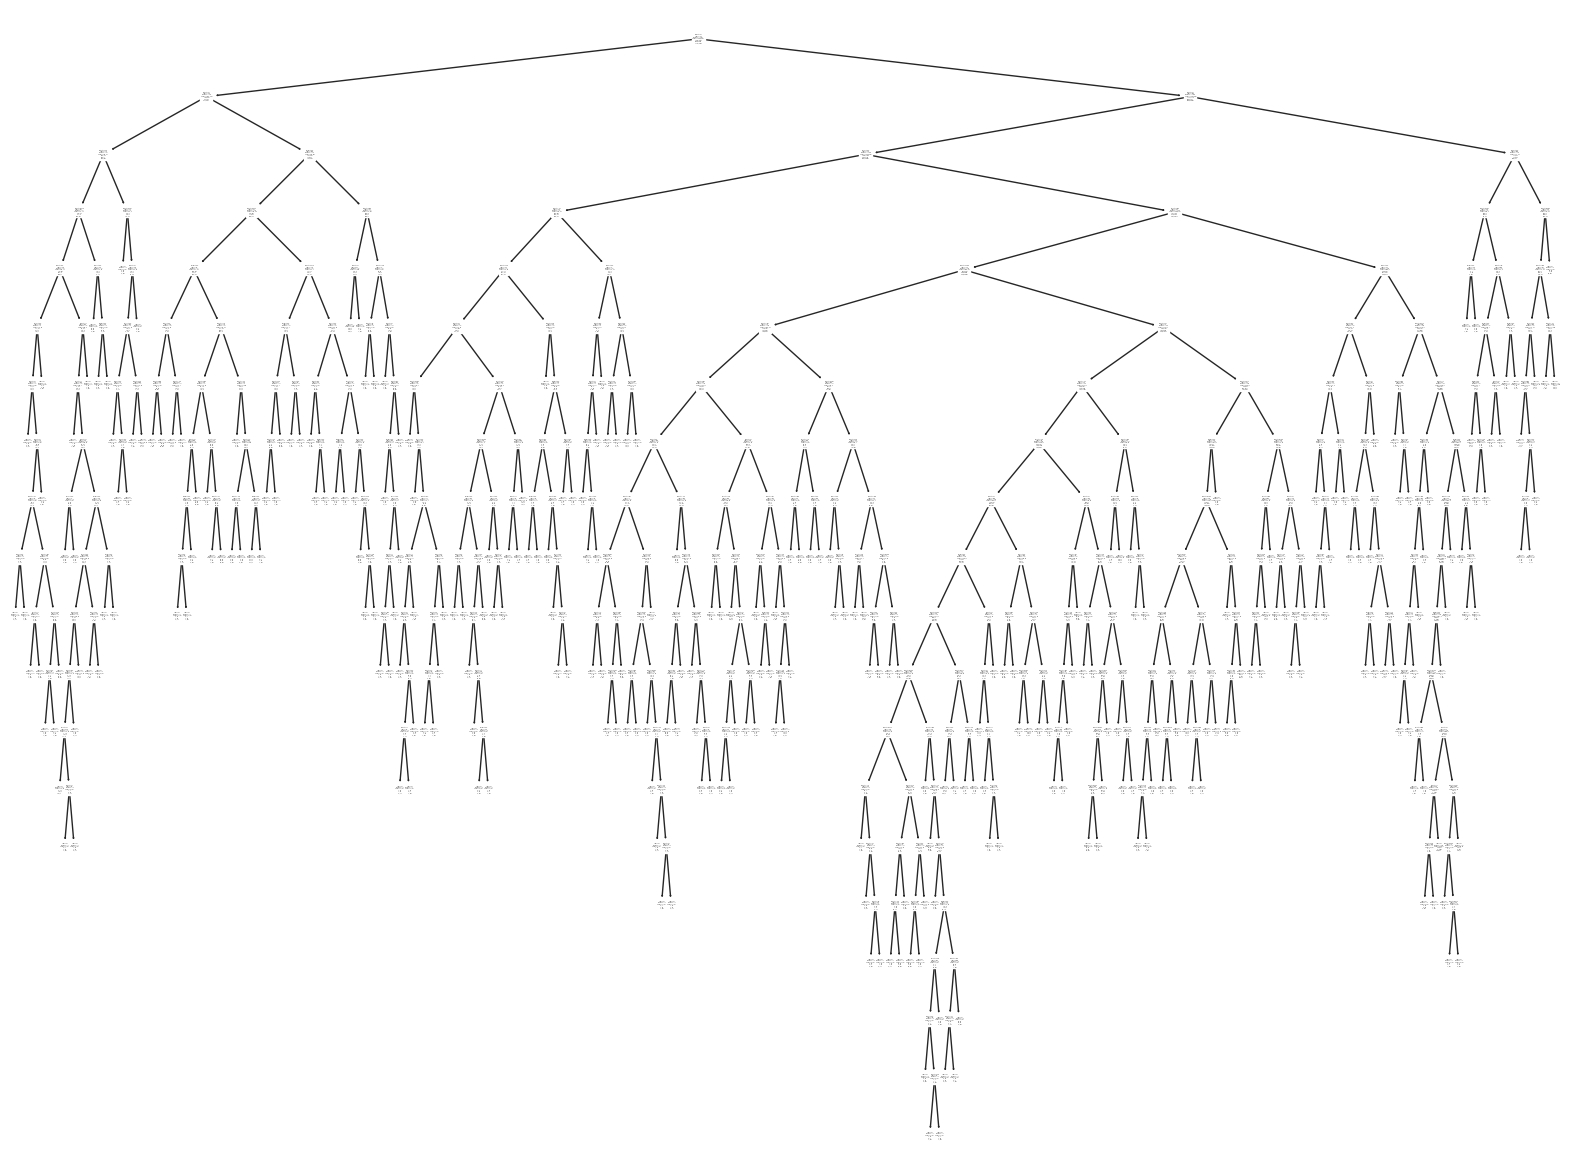

In [203]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(model_DT);
# fig.savefig("decistion_tree.png")

In [208]:
y_pred_DT = model_DT.predict(X_test)

In [209]:
feature_importances = pd.Series(model_DT.feature_importances_, model_DT.feature_names_in_).sort_values()

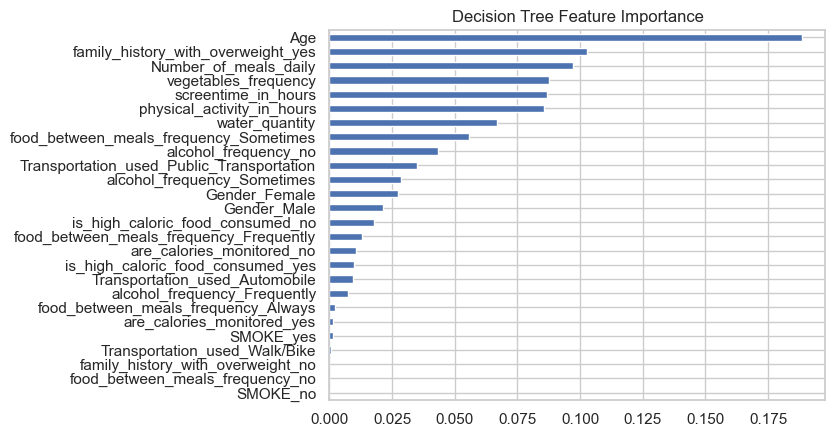

In [210]:
feature_importances.plot.barh();
plt.title('Decision Tree Feature Importance');

### Using GridSearch and cross validation on train and test data

In [62]:
from sklearn.model_selection import GridSearchCV

In [211]:
param_choices = [{'max_depth': range(3,10),
                 'min_samples_leaf': range(1,3),
                 'max_features': ['sqrt','log2']
}]

gridsearch = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_choices, cv=5, scoring='roc_auc')  # Using 5-fold cross-validation
gridsearch_PCA = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), param_choices, cv=5, scoring='roc_auc')  # Using 5-fold cross-validation


In [212]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': range(3, 10),
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': range(1, 3)}],
             scoring='roc_auc')

In [213]:
gridsearch_PCA.fit(X_train_PCA, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': range(3, 10),
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_leaf': range(1, 3)}],
             scoring='roc_auc')

In [70]:
gridsearch.best_params_

{'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1}

In [71]:
gridsearch_PCA.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2}

In [72]:
model_GS = tree.DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_leaf=1, random_state=42)

model_GS.fit(X_train, y_train)

y_pred_grid = model_GS.predict(X_test)

In [214]:
model_GS_pca = tree.DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2, random_state=42)

model_GS_pca.fit(X_train_PCA, y_train)

y_pred_grid_pca = model_GS_pca.predict(X_test_PCA)

### K Nearest Neighbors classifier

#### Without using PCA training data

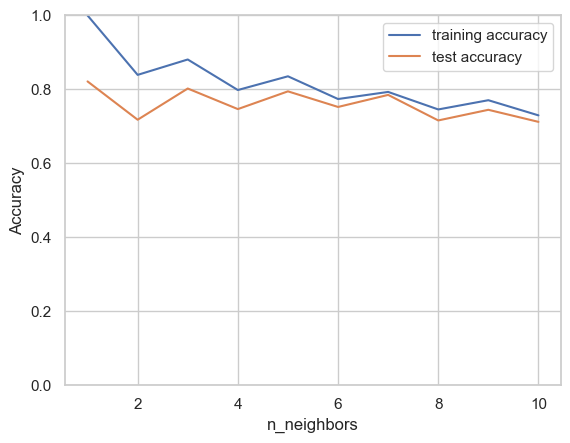

In [312]:
# Code adapted from: Introduction to Machine Learning with Python by Muller and Guido

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
possible_neighbors = range(1, 11)

for n_neighbors in possible_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # testing accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(possible_neighbors, training_accuracy, label="training accuracy")
plt.plot(possible_neighbors, test_accuracy, label="test accuracy");
plt.ylim((0,1))
plt.ylabel("Accuracy");
plt.xlabel("n_neighbors");
plt.legend();

In [226]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

In [241]:
knn_report=classification_report(y_test, y_pred_knn,target_names=y_test.columns)

/Users/nehabhatia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation


#### Classification report for a Decision Tree Classifier model optimized using GridSearchCV. The model evaluation is performed using 5-fold cross-validation.

In [308]:
gridsearch_report = classification_report(y_test, y_pred_grid, target_names=y_test.columns)
print('Gridsearch Decision Tree')
print(gridsearch_report)

Gridsearch Decision Tree
                                precision    recall  f1-score   support

Obese_Type_Insufficient Weight       0.85      0.55      0.67        64
      Obese_Type_Normal Weight       0.62      0.56      0.59        75
              Obese_Type_Obese       0.77      0.80      0.79       246
         Obese_Type_Overweight       0.58      0.45      0.51       136

                     micro avg       0.72      0.64      0.68       521
                     macro avg       0.71      0.59      0.64       521
                  weighted avg       0.71      0.64      0.67       521
                   samples avg       0.64      0.64      0.64       521



/Users/nehabhatia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Classification report for a Decision Tree Classifier model optimized using GridSearchCV with hyperparameters tuned for the variables retaining 90% variability after applying PCA dimensionality reduction technique. The model evaluation was performed using 5-fold cross-validation.

In [309]:
gridsearch_PCA_report = classification_report(y_test, y_pred_grid_pca, target_names=y_test.columns)
print('Gridsearch Decision Tree')
print(gridsearch_PCA_report)

Gridsearch Decision Tree
                                precision    recall  f1-score   support

Obese_Type_Insufficient Weight       0.89      0.62      0.73        64
      Obese_Type_Normal Weight       0.68      0.31      0.42        75
              Obese_Type_Obese       0.81      0.79      0.80       246
         Obese_Type_Overweight       0.58      0.45      0.51       136

                     micro avg       0.75      0.61      0.67       521
                     macro avg       0.74      0.54      0.62       521
                  weighted avg       0.74      0.61      0.66       521
                   samples avg       0.61      0.61      0.61       521



/Users/nehabhatia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Classification report for a Decision Tree Classifier model

In [236]:
original_decision_tree_report = classification_report(y_test, y_pred, target_names=y_test.columns)
print(original_decision_tree_report)

                                precision    recall  f1-score   support

Obese_Type_Insufficient Weight       0.78      0.81      0.79        64
      Obese_Type_Normal Weight       0.51      0.48      0.49        75
              Obese_Type_Obese       0.88      0.87      0.88       246
         Obese_Type_Overweight       0.67      0.69      0.68       136

                     micro avg       0.76      0.76      0.76       521
                     macro avg       0.71      0.71      0.71       521
                  weighted avg       0.76      0.76      0.76       521
                   samples avg       0.76      0.76      0.76       521



#### Classification report for KNN model

In [310]:
print(knn_report)

                                precision    recall  f1-score   support

Obese_Type_Insufficient Weight       0.80      0.83      0.82        64
      Obese_Type_Normal Weight       1.00      0.23      0.37        75
              Obese_Type_Obese       0.84      0.93      0.88       246
         Obese_Type_Overweight       0.82      0.82      0.82       136

                     micro avg       0.83      0.79      0.81       521
                     macro avg       0.87      0.70      0.72       521
                  weighted avg       0.85      0.79      0.78       521
                   samples avg       0.79      0.79      0.79       521

